# Drug Review Analysis [Part-2]

### Team 10:
- Krishna Koushik Parimi
- Ravi Tarun Prasad Nimmalapudi
- Naveen Kumar Pallanti

### Statistical Analysis

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
train_df = pd.read_csv("C://Users//rtpn2//OneDrive//Desktop//WinterQ24//Machine Learning//Project//Data//drugsComTrain_raw.tsv", delimiter='\t')
test_df = pd.read_csv("C://Users//rtpn2//OneDrive//Desktop//WinterQ24//Machine Learning//Project//Data//drugsComTrain_raw.tsv", delimiter='\t')

In [24]:
train_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [25]:
test_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [26]:
print(len(train_df))
print(len(test_df))

161297
161297


In [27]:
test_df.columns    

Index(['Unnamed: 0', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [28]:
numerical_cols = ['rating', 'usefulCount']
text_cols = ['drugName', 'condition']

- **We featured these columns because they are probably the best sources of information and aligned with the goals of the analysis.**
- **Regression analysis aims to predict review scores by understanding the numerical insights that "Rating" and "usefulCount" influence the usefulness of reviews**
- **Where as 'drugName' and 'condition' is pivotal in understanding how medications are prescribed.**
- **These features are important for regression analysis as well as unsupervised data clustering tasks because it enables the investigation of patient opinions about particular drugs and how well they work to treat different health conditions.**

In [29]:
pd.concat([train_df[numerical_cols].describe(),test_df[numerical_cols].describe()],axis=1)

,rating,usefulCount,rating,usefulCount
count,161297.000000,161297.000000,161297.000000,161297.000000
mean,6.994377,28.004755,6.994377,28.004755
std,3.272329,36.403742,3.272329,36.403742
min,1.000000,0.000000,1.000000,0.000000
25%,5.000000,6.000000,5.000000,6.000000
50%,8.000000,16.000000,8.000000,16.000000
75%,10.000000,36.000000,10.000000,36.000000
max,10.000000,1291.000000,10.000000,1291.000000


In [30]:
pd.concat([train_df[text_cols].describe(),test_df[text_cols].describe()],axis=1)

,drugName,condition,drugName,condition
count,161297,160398,161297,160398
unique,3436,884,3436,884
top,Levonorgestrel,Birth Control,Levonorgestrel,Birth Control
freq,3657,28788,3657,28788


**Descriptions of the selected features from both traindf and testdf dataframes**

In [31]:
 train_df.loc[train_df['condition'].isna()]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,61073,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
...,...,...,...,...,...,...,...
160468,117817,Multivitamin with minerals,NaN,"""Severe hives itching after taking for 6 months""",5.0,"November 15, 2015",0
160500,657,Medroxyprogesterone,NaN,"""I am 18 and I have been using the shot for 8 ...",6.0,"November 20, 2011",2
160689,104844,Ethinyl estradiol / levonorgestrel,NaN,"""I&#039;ve been on Loseasonique for about 2 we...",10.0,"April 13, 2010",3
160752,41252,Acetaminophen / oxycodone,NaN,"""This is my third day using this pain medicine...",10.0,"December 13, 2010",4


In [32]:
 test_df.loc[test_df['condition'].isna()]

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
30,51452,Azithromycin,NaN,"""Very good response. It is so useful for me. """,10.0,"August 18, 2010",1
148,61073,Urea,NaN,"""Accurate information.""",10.0,"July 2, 2011",13
488,132651,Doxepin,NaN,"""So far so good. Good for me and I can take it...",10.0,"October 20, 2010",25
733,44297,Ethinyl estradiol / norgestimate,NaN,"""I haven&#039;t been on it for a long time and...",8.0,"January 24, 2011",1
851,68697,Medroxyprogesterone,NaN,"""I started the shot in July 2015 and ended in ...",6.0,"March 23, 2017",1
...,...,...,...,...,...,...,...
160468,117817,Multivitamin with minerals,NaN,"""Severe hives itching after taking for 6 months""",5.0,"November 15, 2015",0
160500,657,Medroxyprogesterone,NaN,"""I am 18 and I have been using the shot for 8 ...",6.0,"November 20, 2011",2
160689,104844,Ethinyl estradiol / levonorgestrel,NaN,"""I&#039;ve been on Loseasonique for about 2 we...",10.0,"April 13, 2010",3
160752,41252,Acetaminophen / oxycodone,NaN,"""This is my third day using this pain medicine...",10.0,"December 13, 2010",4


### Rationale:

- **Since our data is clean, as we indicated in part 1 (initial analysis), we ran a few statistical tests and ignored the column date, which adds nothing to our drug review.**
- **As expected, this shows that the distributions of the data in the two datasets are similar. They both lack some condition data as well. Since those data entries make up a small percentage of the total and there is no way to fill in the gaps with average condition, we decided to ignore them.**
- **And we believe that in the upcoming weeks, we should investigate the review column further in order to conduct an exploratory data analysis and extract sentiment analysis.**

## (b) Boxplots :

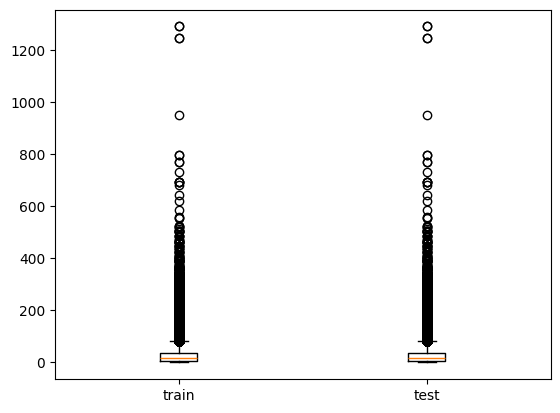

In [33]:
plt.boxplot([train_df['usefulCount'], test_df['usefulCount']], labels=['train','test'])
plt.show()

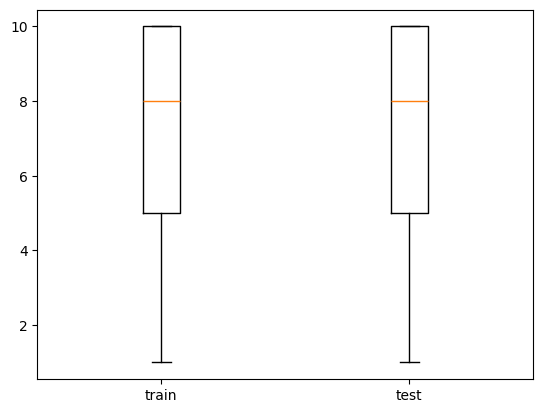

In [34]:
plt.boxplot([train_df['rating'], test_df['rating']], labels=['train', 'test'])
plt.show()

### Rationale:
**Boxplots shows how the data in the split dataset have similar distributions. We can also see that how each review's useful count is concentrated around a low number, with a large number of outliers extending the distribution to a maximum value.**

## (c) Pairplots :

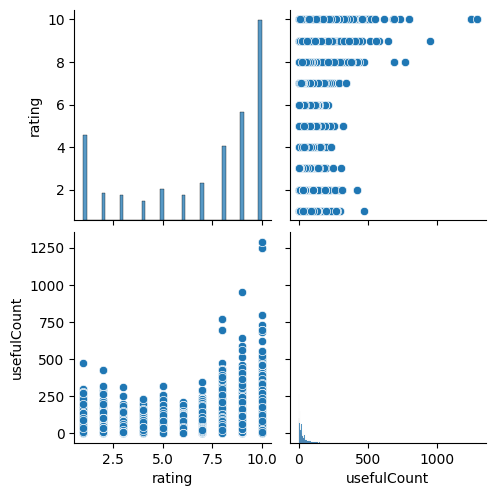

In [35]:
sns.pairplot(train_df[numerical_cols])

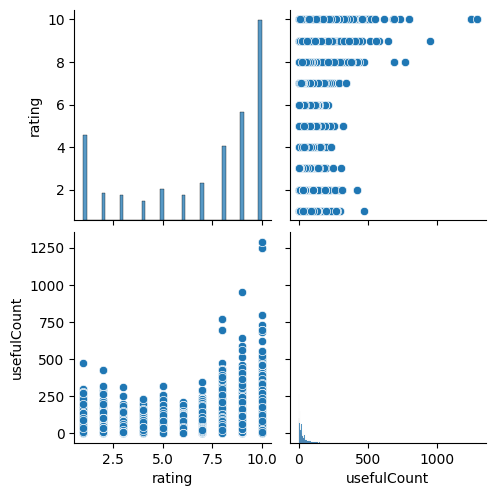

In [36]:
sns.pairplot(test_df[numerical_cols])

### Rationale:
**From the plots we can infer that there is no clear correlation between the useful count and the quantity of reviews at a given rating.**

## (d) Correlation :

In [37]:
 # calculate Pearson's correlation
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(train_df['rating'], train_df['usefulCount'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.234


In [38]:
 # calculate Pearson's correlation
from scipy.stats import pearsonr
# calculate Pearson's correlation
corr, _ = pearsonr(test_df['rating'], test_df['usefulCount'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.234


### Rationale:
**Since we are unable to find strong correlation, we decided to perform sentiment analysis on the review text to generate a sentiment score which allows us to explore whether there is any correlation between the sentiment expressed in the reviews with other features such as the rating and useful count.**

In [39]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [40]:
sia = SentimentIntensityAnalyzer()

In [41]:
train_Sentiment = train_df['review'].apply(sia.polarity_scores).apply(pd.Series)
test_Sentiment = test_df['review'].apply(sia.polarity_scores).apply(pd.Series)

In [42]:
train_df['sentiment'] = train_Sentiment['compound']
test_df['sentiment'] = test_Sentiment['compound']

In [43]:
train_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,-0.2960
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,0.9174
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.6160
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,0.9403


In [44]:
test_df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount,sentiment
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,-0.2960
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,0.9174
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,0.6160
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,0.7184
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,0.9403


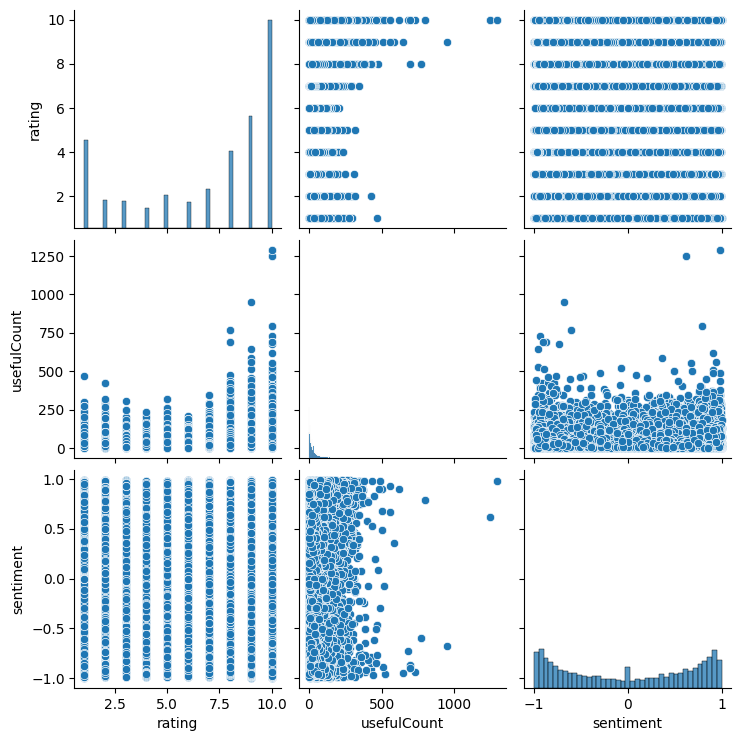

In [45]:
sns.pairplot(train_df[['rating', 'usefulCount', 'sentiment']])

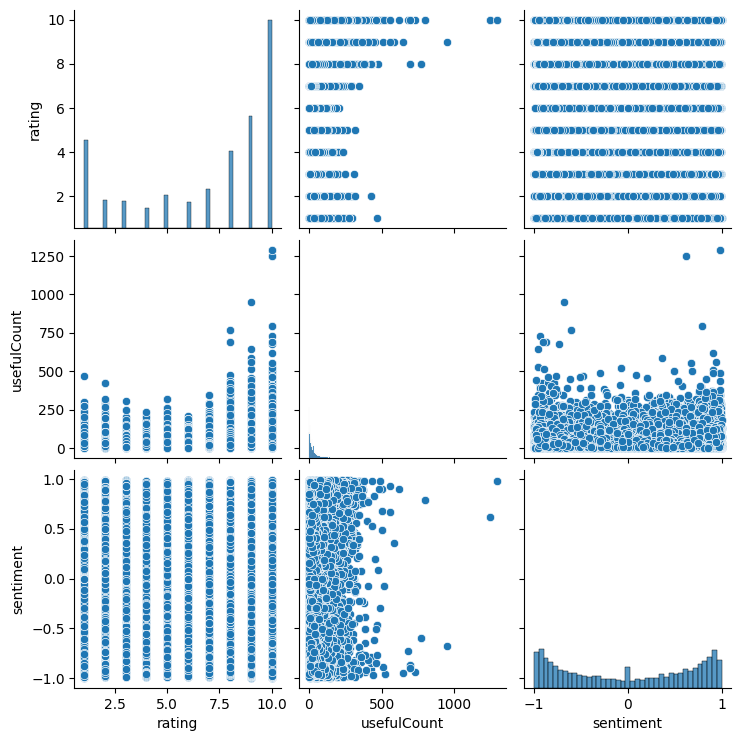

In [46]:
sns.pairplot(test_df[['rating', 'usefulCount', 'sentiment']])

### Rationale:
**Again, we find no correlation in the pairplots with the sentiment score for each review. In order to predict the rating from review text with accuracy, we will need to train our own sentiment model in future.**

## (e) Key learnings :

**We've learned the importance of thoughtful feature selection aligned with the analysis goals. It's crucial to leverage the most informative columns, like 'Rating' and 'usefulCount' for regression analysis, and 'drugName' and 'condition' for understanding medication usage patterns. However, challenges arose in uncovering correlations and extracting meaningful insights from the data, especially with sentiment analysis. In spite of this, we have learned a lot about exploratory data analysis methods and the need of fine-tuning models to produce exact predictions. For upcoming weeks, we aim to further explore sentiment analysis to correctly estimate the rating based on the review text.**
